# EDA for music recommendation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Importing

In [ ]:
STAGE_2_PATH = "/work/itunes_processed/rec_merged_2.csv"
STAGE_3_PATH = "/work/itunes_processed/rec_merged_3.csv"

In [ ]:
df_stage2: pd.DataFrame = pd.read_csv(STAGE_2_PATH)
df_stage2['rec_type'].replace(['Rand'], 'Random', inplace=True)
df_stage2

,popularity,loudness,danceability,energy,key,speechiness,acousticness,instrumentalness,valence,tempo,...,emo_post_arousal,rec_type,time,weather type,pressure,temperature,humidity,gps_speed,arousal_change,valence_change
0,22.0,-12.891,0.591,0.340,2.0,0.0298,0.60000,0.000027,0.503,126.951,...,-0.347062,GCN,3,2,1003,24,95,0.000000,0.056438,0.115240
1,22.0,-12.891,0.591,0.340,2.0,0.0298,0.60000,0.000027,0.503,126.951,...,-0.206316,GCN,2,0,994,30,73,0.097190,0.046184,0.062349
2,22.0,-12.891,0.591,0.340,2.0,0.0298,0.60000,0.000027,0.503,126.951,...,-0.233082,GCN,3,1,999,24,99,0.000000,0.079418,-0.094844
3,22.0,-12.891,0.591,0.340,2.0,0.0298,0.60000,0.000027,0.503,126.951,...,-0.335536,GCN,2,1,999,28,76,1.117141,-0.120286,-0.112771
4,22.0,-12.891,0.591,0.340,2.0,0.0298,0.60000,0.000027,0.503,126.951,...,0.133190,GCN,3,2,994,22,97,0.000000,-0.020560,0.053698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,69.0,-6.147,0.518,0.858,0.0,0.0672,0.00563,0.003490,0.249,117.897,...,-0.408214,Random,3,0,1019,10,49,1.500000,-1.331214,-0.338066
733,69.0,-6.147,0.518,0.858,0.0,0.0672,0.00563,0.003490,0.249,117.897,...,0.133190,Random,2,0,1012,14,56,2.044992,0.025690,0.053792
734,69.0,-6.147,0.518,0.858,0.0,0.0672,0.00563,0.003490,0.249,117.897,...,0.851775,Random,1,0,1034,5,24,0.000191,0.412525,-0.460922
735,69.0,-6.147,0.518,0.858,0.0,0.0672,0.00563,0.003490,0.249,117.897,...,0.172891,Random,2,1,915,-6,53,0.000000,0.034641,0.092215


Stage 3's preprocessed data contains an extra "preference" column.

In [ ]:
df_stage3: pd.DataFrame = pd.read_csv(STAGE_3_PATH)
df_stage3

,popularity,loudness,danceability,energy,key,speechiness,acousticness,instrumentalness,valence,tempo,...,emo_post_arousal,rec_type,time,weather type,pressure,temperature,humidity,gps_speed,arousal_change,valence_change
0,24.0,-8.299,0.281,0.5660,5.0,0.0368,0.056000,0.368000,0.0881,170.030,...,-0.479950,Situ-MT_c,3,0,1025,14,20,0.0,0.060050,-0.160385
1,24.0,-8.299,0.281,0.5660,5.0,0.0368,0.056000,0.368000,0.0881,170.030,...,-0.559733,Situ-MT_c,1,1,1020,16,26,0.0,-0.119733,-0.169932
2,27.0,-4.149,0.530,0.7350,0.0,0.0528,0.008500,0.000000,0.9560,180.082,...,-0.087719,Random,3,0,1013,23,22,0.0,0.125281,0.186573
3,61.0,-24.661,0.417,0.0889,2.0,0.0360,0.926000,0.897000,0.4110,88.250,...,-0.575188,Situ-MT,2,0,1025,14,20,0.0,0.240562,0.198102
4,61.0,-24.661,0.417,0.0889,2.0,0.0360,0.926000,0.897000,0.4110,88.250,...,-0.556948,Situ-MT,3,1,1020,16,26,0.0,-0.005448,0.281353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,46.0,-5.333,0.670,0.7040,6.0,0.0296,0.073400,0.000000,0.5420,132.062,...,-0.144806,Random,1,0,998,22,42,0.0,0.339694,0.220053
505,42.0,-4.122,0.561,0.9590,10.0,0.0504,0.037500,0.907000,0.7190,124.967,...,0.192147,Random,3,0,1007,18,42,0.0,-0.036103,-0.030608
506,45.0,-15.978,0.469,0.3630,0.0,0.0443,0.564000,0.000001,0.4510,79.397,...,0.203286,Random,2,0,1019,18,21,0.0,-0.325714,-0.027726
507,67.0,-5.903,0.320,0.9170,9.0,0.0771,0.071700,0.000000,0.7150,190.757,...,0.144806,Random,3,0,1019,18,21,0.0,0.537556,0.253509


In [ ]:
# For the combined df, drop stage 3's extra column.
df = pd.concat([df_stage2, df_stage3.drop(columns=["preference"]) ], ignore_index=True)
len(df)

1246

## Visualization Functions

In [ ]:
def plot_scatter_hued(
        data: pd.DataFrame, 
        hue_column_name: str, 
        x='arousal_change', 
        y='valence_change', 
        alpha=1,
        ylims=[-1,1],
        xlims=[-1,1]
        ):
    ax = sns.scatterplot(data=data, x=x, y=y, hue=hue_column_name, alpha=alpha)
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlim(xlims[0], xlims[1])
    
    plt.legend(title=hue_column_name, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    

In [ ]:
def plot_kde(data: pd.Series, title: str, xlabel: str, ylabel: str='Density', xlim=[-1,1]):
    sns.kdeplot(data, fill=True)

    plt.xlim(xlim)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## General analysis

Slight positive trend between valence and user rating/preference, which lines up with the research findings, stating "The figures demonstrate that users typically experience a more positive valence post-listening to favored music, impacting their arousal variably, with no specific pattern linked to ratings."


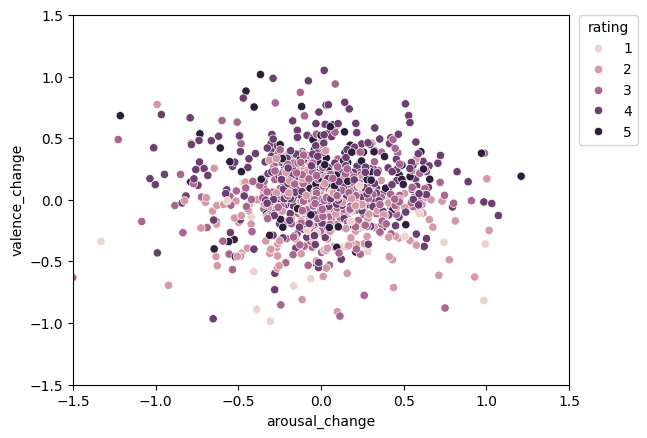

In [ ]:
plot_scatter_hued(df, "rating", ylims=[-1.5,1.5], xlims=[-1.5,1.5])

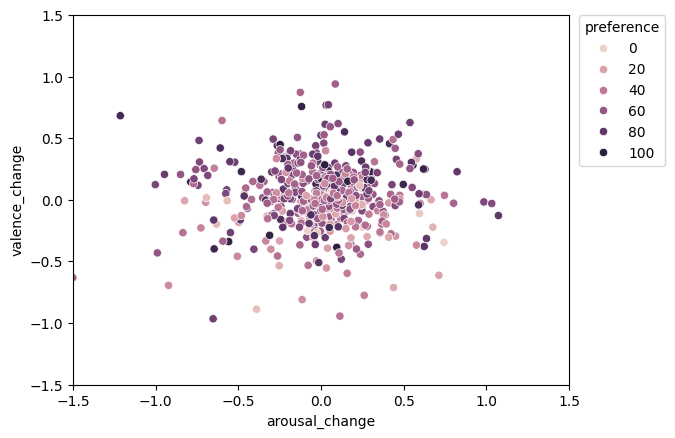

In [ ]:
plot_scatter_hued(df_stage3, "preference", ylims=[-1.5,1.5], xlims=[-1.5,1.5])

### Effect of rec_type

In [ ]:
df.rec_type.unique()

array(['GCN', 'WD', 'Random', 'Situ-MT_c', 'Situ-MT'], dtype=object)

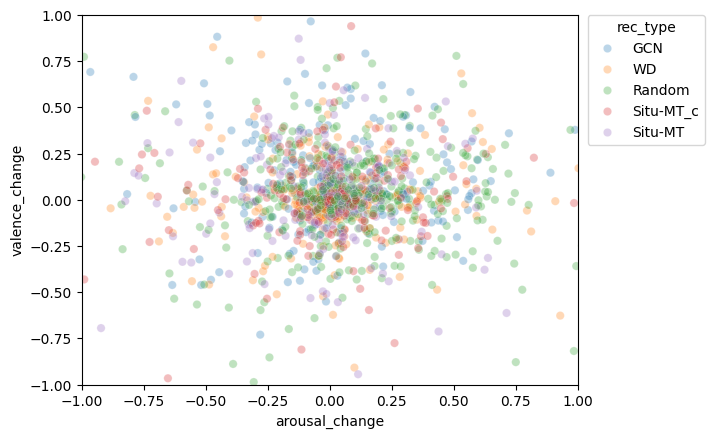

In [ ]:
plot_scatter_hued(df, "rec_type", alpha=0.3)

In [ ]:
for rec_type in df.rec_type.unique():
    means = df[df.rec_type == rec_type].rating.mean()
    print(rec_type, " - Mean rating:", means)
    
# Situ-MT rec

GCN  - Mean rating: 3.3548387096774195
WD  - Mean rating: 3.1497975708502026
Random  - Mean rating: 3.1358024691358026
Situ-MT_c  - Mean rating: 3.3508771929824563
Situ-MT  - Mean rating: 3.525714285714286


In [ ]:
def analyze_single_rec_type(df, rec_type: str):
    df_single_rec = df[df.rec_type == rec_type]
    plot_scatter_hued(df_single_rec, "rec_type")
    means = df_single_rec[["valence_change", "arousal_change"]].mean()
    stds =  df_single_rec[["valence_change", "arousal_change"]].std()
    print(f'Mean  -  V_d: {means.valence_change:.5f}, A_d: {means.arousal_change:.5f}')
    print(f'StdDev - V_d: {stds.valence_change:.5f}, A_d: {stds.arousal_change:.5f}')

GCN

Mean  -  V_d: 0.09440, A_d: 0.00027
StdDev - V_d: 0.26460, A_d: 0.31466


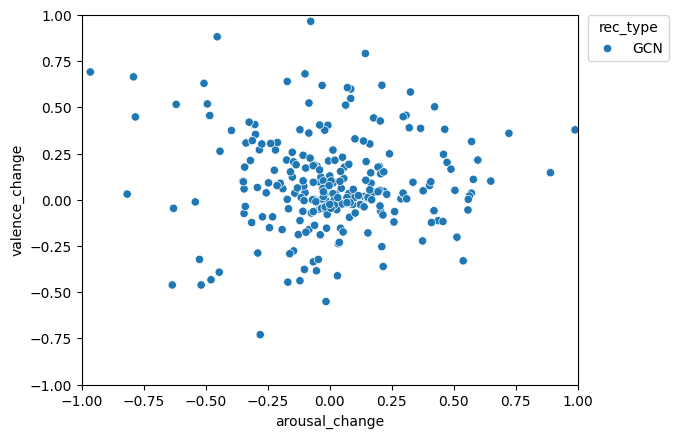

In [ ]:
analyze_single_rec_type(df, "GCN")

Wide-Deep

Mean  -  V_d: 0.02253, A_d: 0.01152
StdDev - V_d: 0.23965, A_d: 0.30721


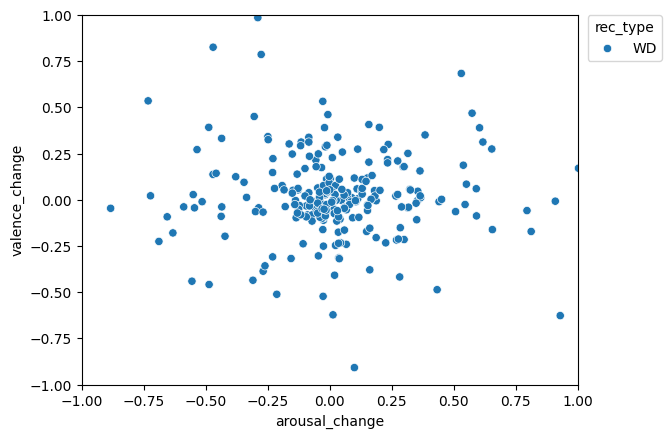

In [ ]:
analyze_single_rec_type(df, "WD")

Mean  -  V_d: 0.01852, A_d: 0.06435
StdDev - V_d: 0.25983, A_d: 0.33083


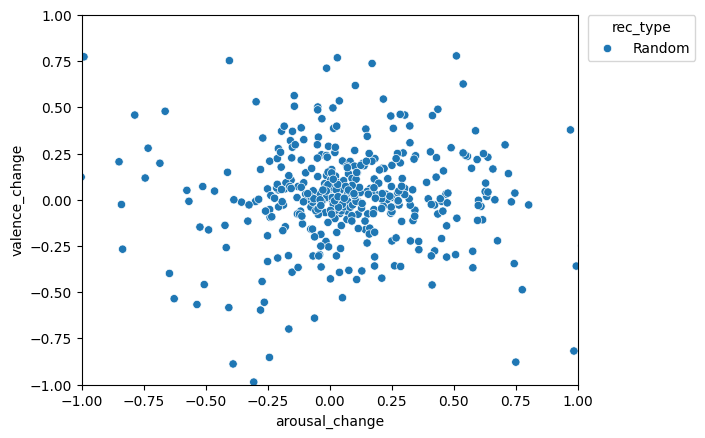

In [ ]:
analyze_single_rec_type(df, "Random")

Mean  -  V_d: 0.02561, A_d: -0.03642
StdDev - V_d: 0.27423, A_d: 0.29688


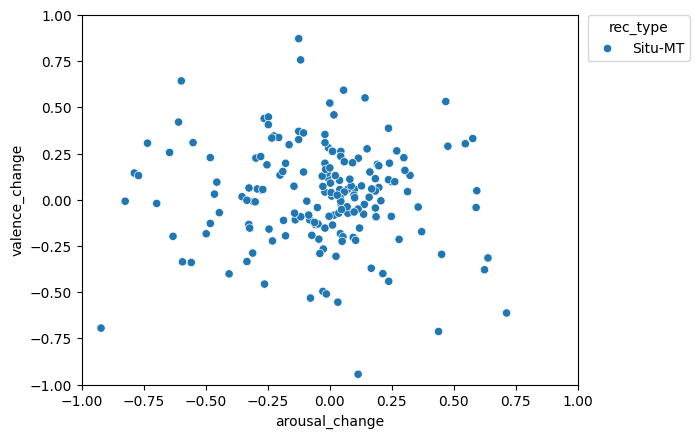

In [ ]:
analyze_single_rec_type(df, "Situ-MT")

Mean  -  V_d: 0.02732, A_d: -0.00693
StdDev - V_d: 0.25425, A_d: 0.34280


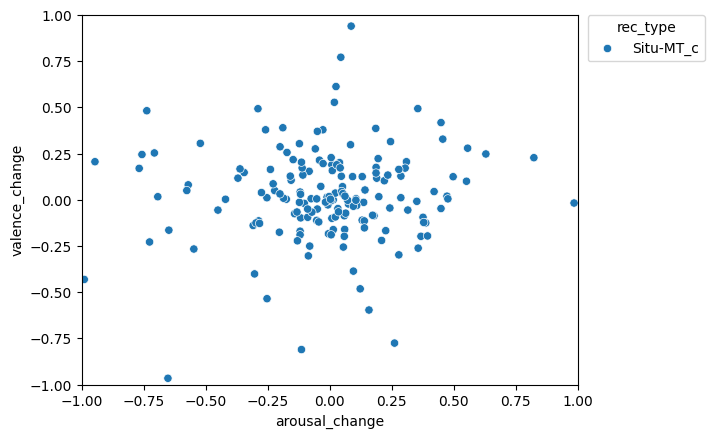

In [ ]:
analyze_single_rec_type(df, "Situ-MT_c")

## Per-user analysis

Taking 1 random user and analyzing data trends.

In [ ]:
USER_ID = 9

In [ ]:
df_user_2 = df_stage2[df_stage2.user_id == USER_ID]
df_user_3 = df_stage3[df_stage3.user_id == USER_ID]

df_user_combined = pd.concat([df_user_2, df_user_3.drop(columns=["preference"]) ], ignore_index=True)

df_user_combined

,popularity,loudness,danceability,energy,key,speechiness,acousticness,instrumentalness,valence,tempo,...,emo_post_arousal,rec_type,time,weather type,pressure,temperature,humidity,gps_speed,arousal_change,valence_change
0,46.0,-15.336,0.6110,0.563,2.0,0.0425,0.00620,0.746000,0.3590,103.002,...,-0.414938,Random,1,1,1007,28,79,0.0,0.302312,0.061463
1,52.0,-8.609,0.6250,0.815,7.0,0.0759,0.27500,0.028800,0.9190,94.352,...,0.186978,Random,1,0,1005,24,98,0.0,0.599478,-0.002656
2,44.0,-7.090,0.6890,0.750,7.0,0.0540,0.47400,0.000002,0.9000,102.710,...,0.071718,GCN,2,1,1003,28,81,0.2,-0.338032,0.307455
3,2.0,-6.789,0.8760,0.530,11.0,0.0696,0.65800,0.896000,0.8590,99.377,...,-0.192101,WD,2,0,1005,29,75,0.0,0.071649,0.012892
4,49.0,-5.300,0.4660,0.634,6.0,0.0289,0.07630,0.000000,0.3240,128.992,...,-0.092208,GCN,3,2,1004,24,98,0.2,-0.478958,-0.432844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,35.0,-7.316,0.0645,0.345,2.0,0.0448,0.00019,0.793000,0.0328,185.277,...,-0.133668,Situ-MT_c,3,0,998,22,42,0.0,0.356332,-0.261728
57,57.0,-7.986,0.3630,0.717,2.0,0.0305,0.02050,0.000637,0.3710,98.434,...,-0.785297,Random,3,0,998,22,42,0.0,-0.286797,0.002732
58,23.0,-18.096,0.3230,0.893,7.0,0.2730,0.56300,0.191000,0.0396,102.162,...,-0.573656,Random,2,0,998,22,42,0.0,-0.389906,-0.888349
59,1.0,-9.243,0.4980,0.460,10.0,0.0340,0.26600,0.000799,0.3560,124.596,...,-0.646060,Random,1,0,998,22,42,0.0,-0.183810,0.398256


Observe individual preferences

<AxesSubplot: xlabel='preference'>

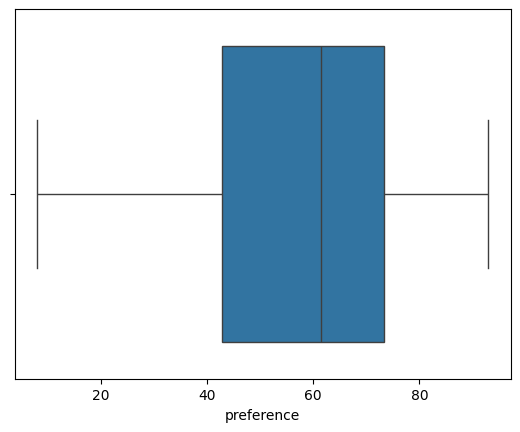

In [ ]:
sns.boxplot(x=df_user_3["preference"])

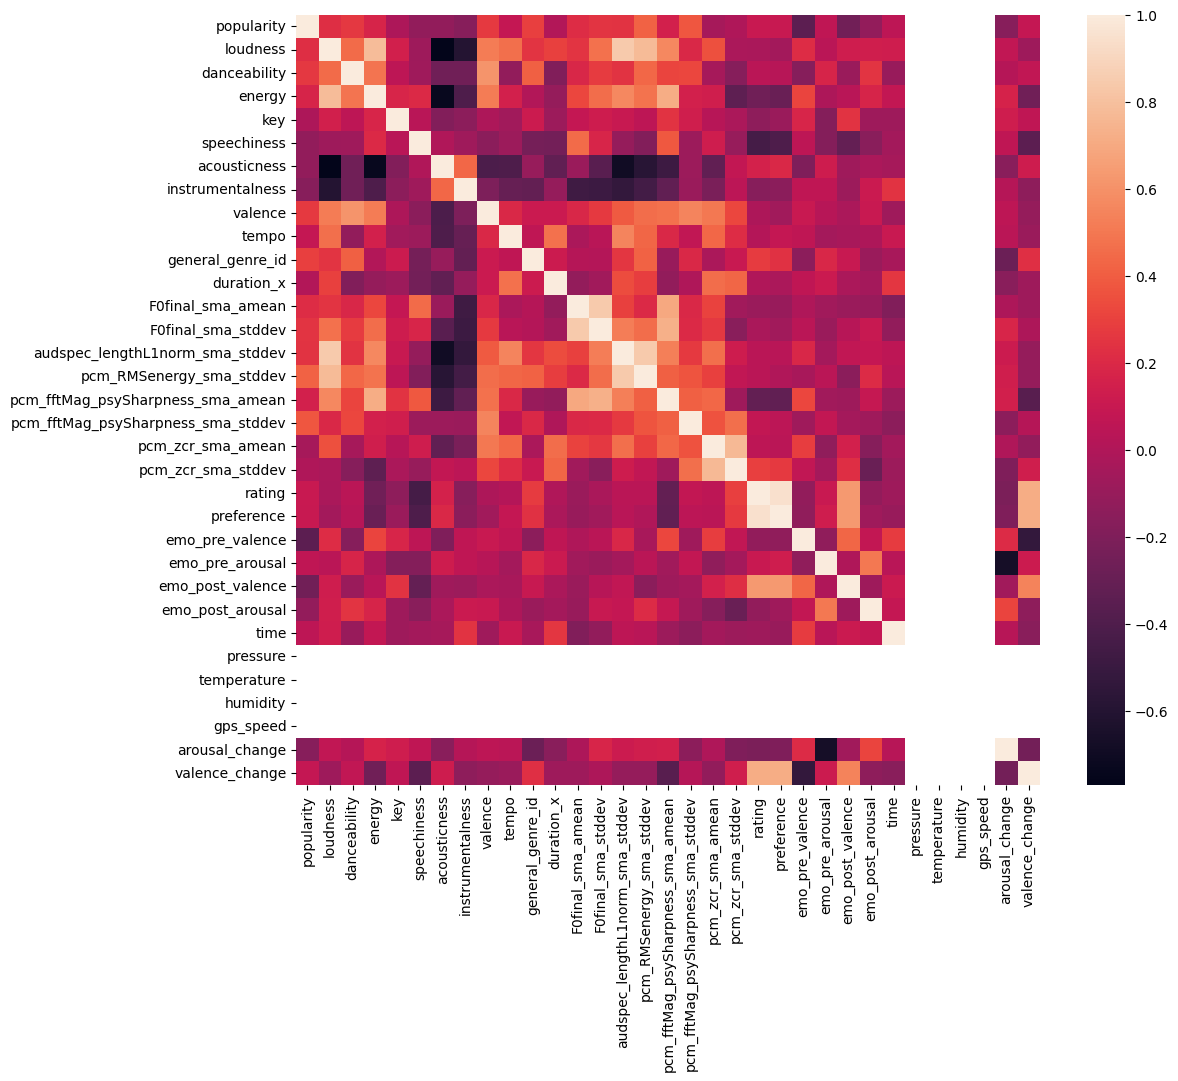

In [ ]:
%matplotlib inline

# Drop some non-meaningful columns
columns_to_drop = ["singer", "rec_type", "weather type", "user_id"]
corr = df_user_3.drop(columns=columns_to_drop).corr(method="pearson")

plt.figure(figsize=(12, 10))
sns.heatmap(corr)
plt.show()




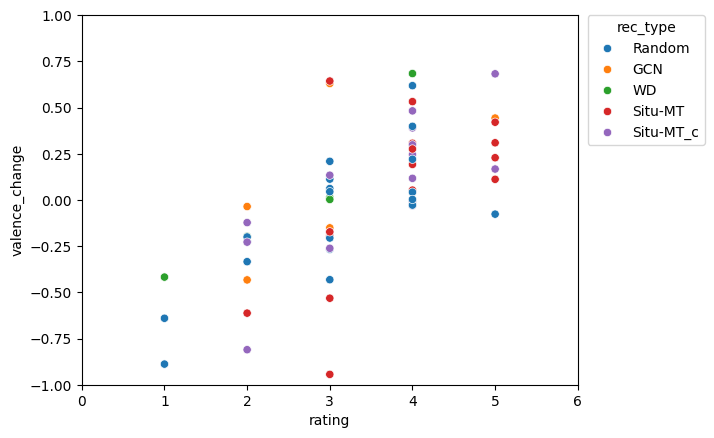

In [ ]:
plot_scatter_hued(
        data=df_user_combined, 
        hue_column_name="rec_type", 
        x='rating', 
        y='valence_change', 
        alpha=1,
        ylims=[-1,1],
        xlims=[0,6]
        )

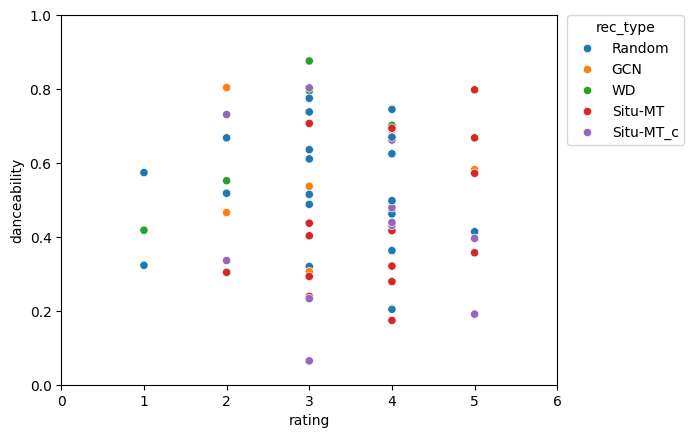

In [ ]:
plot_scatter_hued(
        data=df_user_combined, 
        hue_column_name="rec_type", 
        x='rating', 
        y='danceability', 
        alpha=1,
        ylims=[0,1],
        xlims=[0,6]
        )

User 9 seems to display a high preference for genre #10 (country), but data points are too sparse for conclusiveness

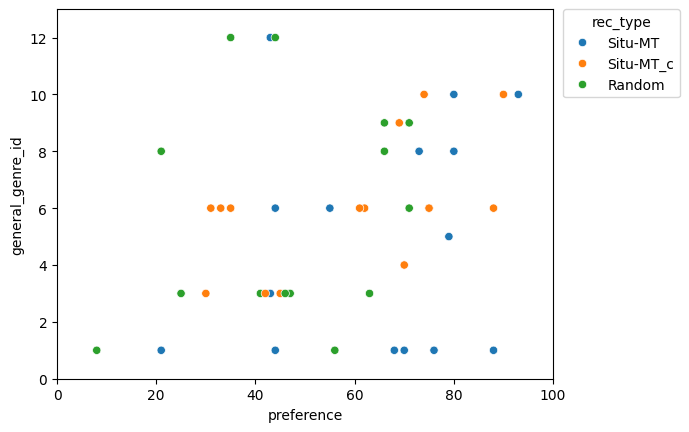

In [ ]:
plot_scatter_hued(
        data=df_user_3, 
        hue_column_name="rec_type", 
        x='preference', 
        y='general_genre_id', 
        alpha=1,
        ylims=[0,13],
        xlims=[0,100]
        )


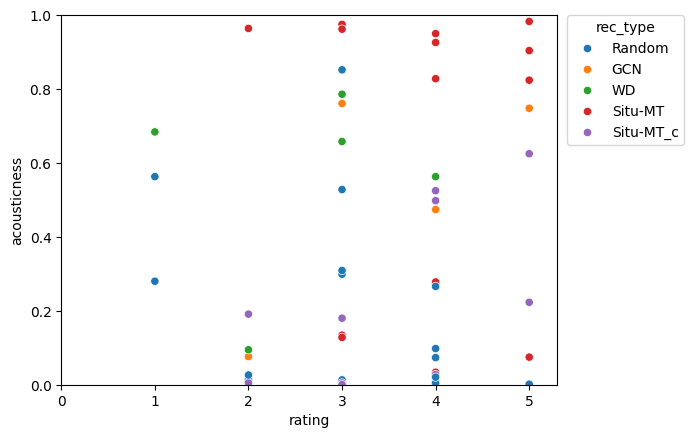

In [ ]:
plot_scatter_hued(
        data=df_user_combined, 
        hue_column_name="rec_type", 
        x='rating', 
        y='acousticness', 
        alpha=1,
        ylims=[0,1],
        xlims=[0,5.3]
        )


In [ ]:
df_user_combined

,popularity,loudness,danceability,energy,key,speechiness,acousticness,instrumentalness,valence,tempo,...,emo_post_arousal,rec_type,time,weather type,pressure,temperature,humidity,gps_speed,arousal_change,valence_change
0,46.0,-15.336,0.6110,0.563,2.0,0.0425,0.00620,0.746000,0.3590,103.002,...,-0.414938,Random,1,1,1007,28,79,0.0,0.302312,0.061463
1,52.0,-8.609,0.6250,0.815,7.0,0.0759,0.27500,0.028800,0.9190,94.352,...,0.186978,Random,1,0,1005,24,98,0.0,0.599478,-0.002656
2,44.0,-7.090,0.6890,0.750,7.0,0.0540,0.47400,0.000002,0.9000,102.710,...,0.071718,GCN,2,1,1003,28,81,0.2,-0.338032,0.307455
3,2.0,-6.789,0.8760,0.530,11.0,0.0696,0.65800,0.896000,0.8590,99.377,...,-0.192101,WD,2,0,1005,29,75,0.0,0.071649,0.012892
4,49.0,-5.300,0.4660,0.634,6.0,0.0289,0.07630,0.000000,0.3240,128.992,...,-0.092208,GCN,3,2,1004,24,98,0.2,-0.478958,-0.432844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,35.0,-7.316,0.0645,0.345,2.0,0.0448,0.00019,0.793000,0.0328,185.277,...,-0.133668,Situ-MT_c,3,0,998,22,42,0.0,0.356332,-0.261728
57,57.0,-7.986,0.3630,0.717,2.0,0.0305,0.02050,0.000637,0.3710,98.434,...,-0.785297,Random,3,0,998,22,42,0.0,-0.286797,0.002732
58,23.0,-18.096,0.3230,0.893,7.0,0.2730,0.56300,0.191000,0.0396,102.162,...,-0.573656,Random,2,0,998,22,42,0.0,-0.389906,-0.888349
59,1.0,-9.243,0.4980,0.460,10.0,0.0340,0.26600,0.000799,0.3560,124.596,...,-0.646060,Random,1,0,998,22,42,0.0,-0.183810,0.398256


In [ ]:
# TODO:
# 1. preproc --> singer to int
# 2. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=75e550ed-719f-4d72-aa2b-dbe53a6ba1db' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>